In [88]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility
from sklearn.neural_network import MLPClassifier

from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting
import math

import pandas as pd
from sklearn import preprocessing, tree
import statistics
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [174]:
def calculate_queue(k:int, lam:float, mu:float):
#     lam = k*mu*rho
    
    rho=lam/(k*mu)
    if (rho == 1):
        return -1,-1,-1,-1
    
    sum_pi0 = 0
    for n in range(0, k-1):
        sum_pi0 += ((k*rho)**n)/math.factorial(n)
    sum_pi0 += ((k*rho)**k)/(math.factorial(k) * (1 - rho))
    
    if (sum_pi0 == 0):
        return -1,-1,-1,-1
    
    pi0 = 1/sum_pi0
    EN_Q = (rho*((k*rho)**k)*pi0)/(math.factorial(k)*(1-rho)**2)
    ET_Q = (((k*rho)**k)*pi0)/(math.factorial(k)*k*mu*(1-rho)**2)
    EN = EN_Q + (lam/mu)
    ET = ET_Q + (1/mu)
        
    return EN_Q, ET_Q, EN, ET



In [175]:
def plot_queue(X, Y, title, xlabel, ylabel):
    start = 2
    if (len(X) < start):
        start = len(X)
    for i in range(start, len(X)):
        plt.plot(X[i], Y[i])
        plt.text(X[i][0], Y[i][0], '{i} servers'.format(i=i+1))

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     plt.gca().invert_xaxis()
    plt.show()
    
def plot_data(lams, servers, rho, title):    
    list_ETQ_X = []
    list_ETQ_Y = []
    
    list_ENQ_X = []
    list_ENQ_Y = []

    list_EN_X = []
    list_EN_Y = []

    list_ET_X = []
    list_ET_Y = []

    for s in servers:
        tmp_list_ETQ_X = []
        tmp_list_ETQ_Y = []
        tmp_list_ENQ_X = []
        tmp_list_ENQ_Y = []
        tmp_list_EN_X = []
        tmp_list_EN_Y = []
        tmp_list_ET_X = []
        tmp_list_ET_Y = []
        for m in lams:
            EN_Q, ET_Q, EN, ET = calculate_queue(s, m, rho)
            if (EN_Q == -1 or ET_Q == -1 or EN == -1 or ET == -1):
                continue
            if (EN_Q > 0):
                tmp_list_ENQ_X.append(m)
                tmp_list_ENQ_Y.append(EN_Q)
            if (ET_Q > 0):
                tmp_list_ETQ_X.append(m)
                tmp_list_ETQ_Y.append(ET_Q)
            if (EN > 0):
                tmp_list_EN_X.append(m)
                tmp_list_EN_Y.append(EN)
            if (ET > 0):
                tmp_list_ET_X.append(m)
                tmp_list_ET_Y.append(ET)

        if (len(tmp_list_ENQ_Y) > 0):
            list_ENQ_X.append(tmp_list_ENQ_X)
            list_ENQ_Y.append(tmp_list_ENQ_Y)

        if (len(tmp_list_ETQ_Y) > 0):
            list_ETQ_X.append(tmp_list_ETQ_X)
            list_ETQ_Y.append(tmp_list_ETQ_Y)

        if (len(tmp_list_EN_Y) > 0):
            list_EN_X.append(tmp_list_EN_X)
            list_EN_Y.append(tmp_list_EN_Y)

        if (len(tmp_list_ET_Y) > 0):
            list_ET_X.append(tmp_list_ET_X)
            list_ET_Y.append(tmp_list_ET_Y)
    
    plot_queue(list_ETQ_X, list_ETQ_Y, title, "arrival rate", "Expected waiting time in the queue (min)")
    plot_queue(list_ENQ_X, list_ENQ_Y, title, "arrival rate", "Expected number of jobs in the queue")
    plot_queue(list_EN_X, list_EN_Y, title, "arrival rate", "expected number of jobs in the system")
    plot_queue(list_ET_X, list_ET_Y, title, "arrival rate", "expected time in the system (min)")
 
    

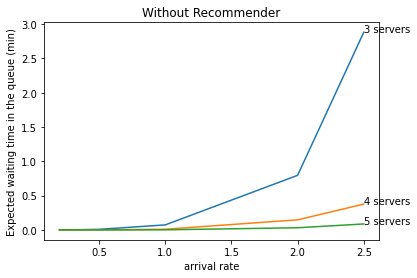

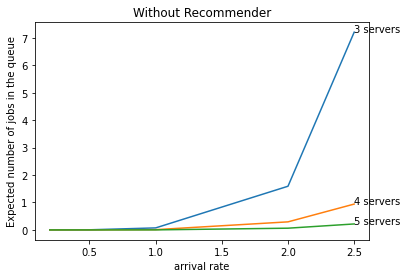

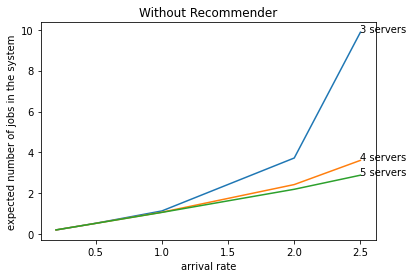

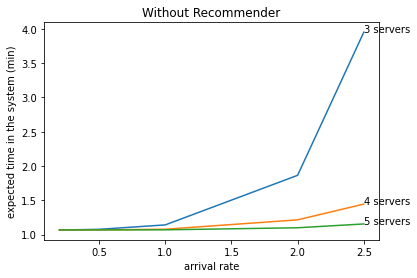

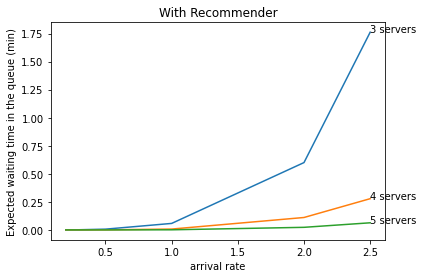

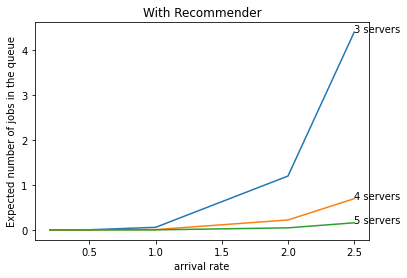

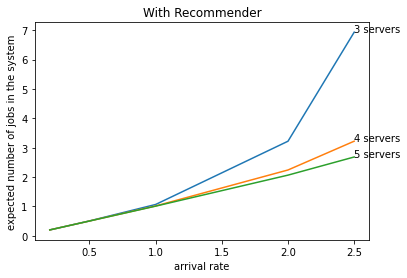

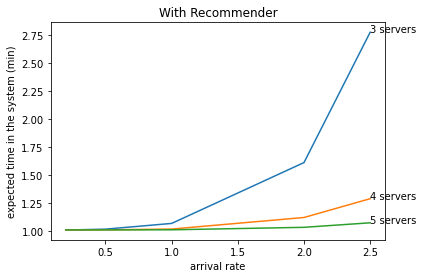

In [176]:
#mus = [5, 4, 3, 2, 1, 0.9, 0.8, 0.7, 0.6]
lams = [2.5, 2, 1, 0.5, 0.3, 0.2]
servers = list(range(1, 6))

plot_data(lams, servers, 0.9360, "Without Recommender")
plot_data(lams, servers, 0.99, "With Recommender")
